In [1]:
import sys
from vis_simple_adic_graph import *
from vis_adic_graph import *

%matplotlib inline

In [2]:
cherryblossompink = (1.0, 0.72, 0.77)
columbiablue = (0.61, 0.87, 1.0)
darkpastelblue = (0.47, 0.62, 0.8)
limegreen = (0.2, 0.8, 0.2)
yellow = (1.0, 1.0, 0.0)
#harlequin = (0.25, 1.0, 0.0)

In [3]:
def visualize(graph, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length
    fig = plt.figure(figsize=(3*length + 1*(length-1), 3))
    grid = plt.GridSpec(1, 3*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
        
    for t in range(graph.length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+3])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t][i,j] != 0:
                            if graph.w_list[t][i,j] == -1:
                                G.add_edge(str(i), str(j), color=cherryblossompink, style="solid")
                            
                            if graph.w_list[t][i,j] == -2:
                                G.add_edge(str(i), str(j), color=darkpastelblue, style="solid")

                            if graph.w_list[t][i,j] == -3:
                                #G.add_edge(str(i), str(j), color=harlequin, style="solid")
                                G.add_edge(str(i), str(j), color=yellow, style="solid")

                            if graph.w_list[t][i,j] == -4:
                                G.add_edge(str(i), str(j), color=limegreen, style="solid")

                            if graph.w_list[t][i,j] == -5:
                                G.add_edge(str(i), str(j), color=columbiablue, style="solid")
                            
                            if graph.w_list[t][i,j] == -6:
                                G.add_edge(str(i), str(j), color="black", style="solid")
                            
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        edge_color = [edge["color"] for edge in G.edges.values()]
        edge_style = [edge["style"] for edge in G.edges.values()]
        
        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, style=edge_style, edge_color=edge_color, **options)
        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+3:counter+4])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 4
            
            
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

# ADIC Graph

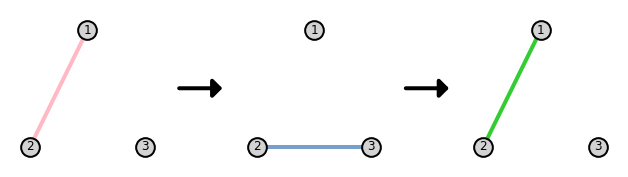

In [4]:
n_nodes = 3
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)


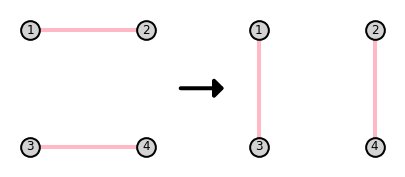

In [5]:
n_nodes = 4
max_degree = 1

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = VisAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
##plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

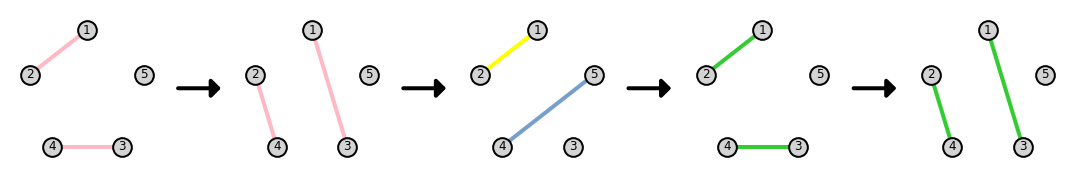

In [6]:
n_nodes = 5
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

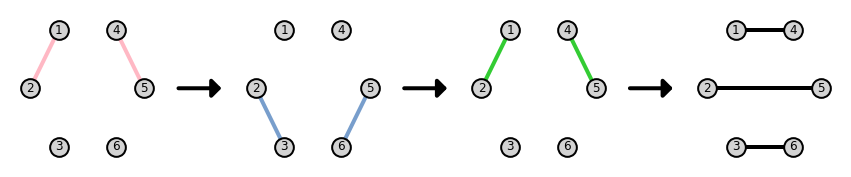

In [7]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

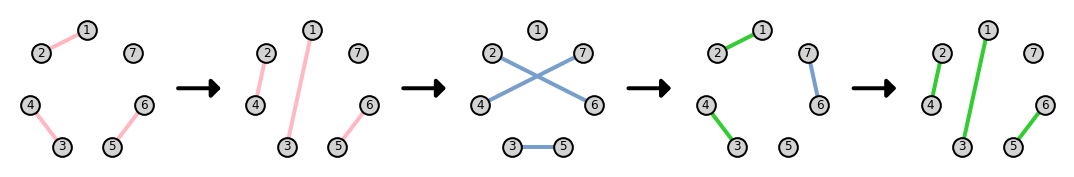

In [8]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

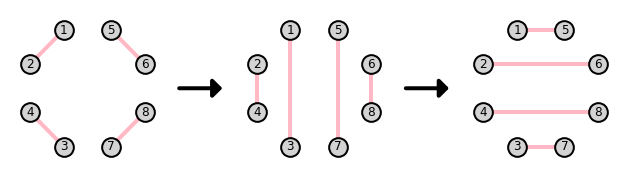

In [9]:
n_nodes = 8
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

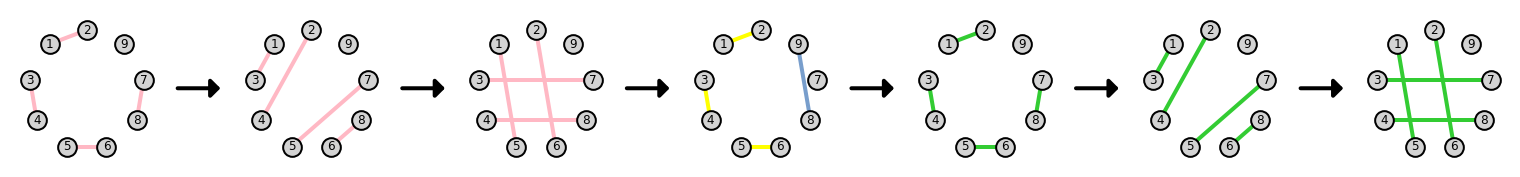

In [10]:
n_nodes = 9
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["0"], pos["1"] = pos["1"], pos["0"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

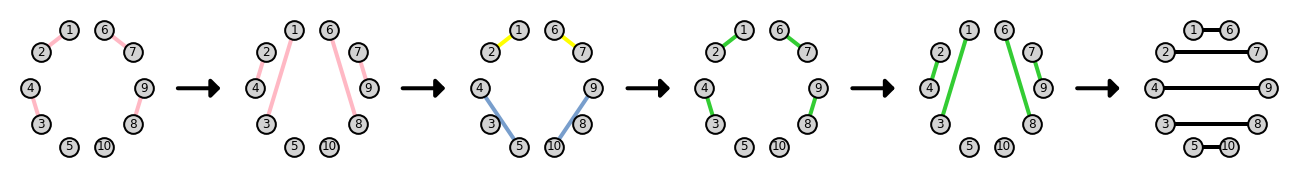

In [11]:
n_nodes = 10

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["2"], pos["3"] = pos["3"], pos["2"]
pos["5"], pos["6"], pos["7"], pos["8"], pos["9"] = pos["9"], pos["8"], pos["7"], pos["6"], pos["5"]
pos["8"], pos["7"] = pos["7"], pos["8"]

g = VisAdicGraph(n_nodes)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# Simple ADIC

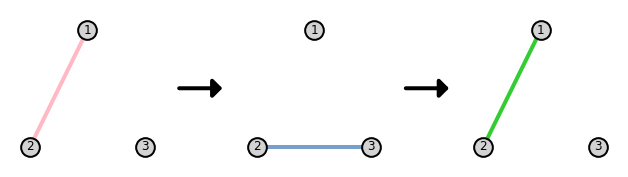

In [12]:
n_nodes = 3
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

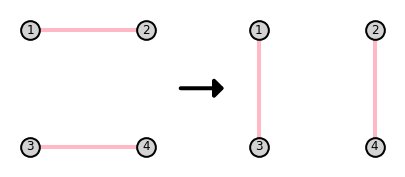

In [13]:
n_nodes = 4
max_degree = 1

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = VisSimpleAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

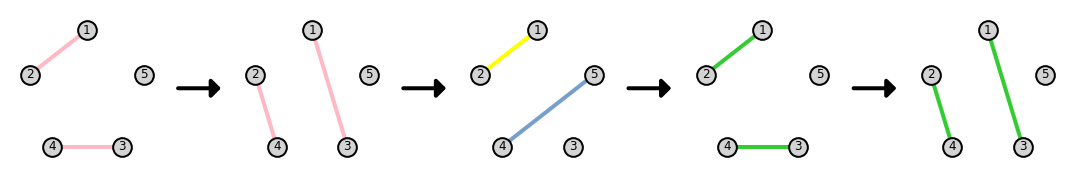

In [14]:
n_nodes = 5
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

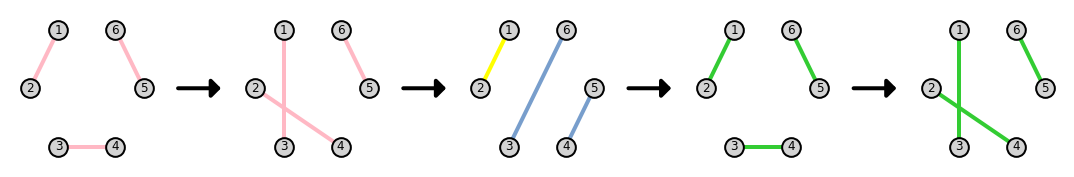

In [15]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

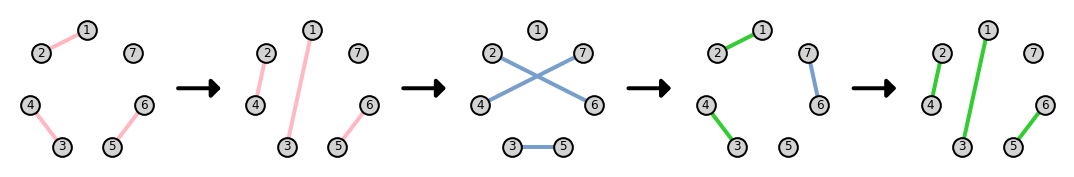

In [16]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

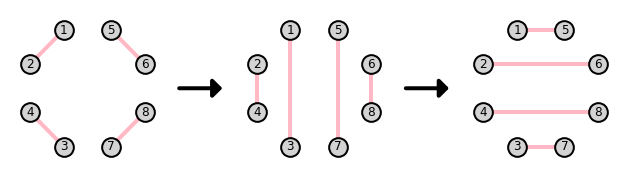

In [17]:
n_nodes = 8
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

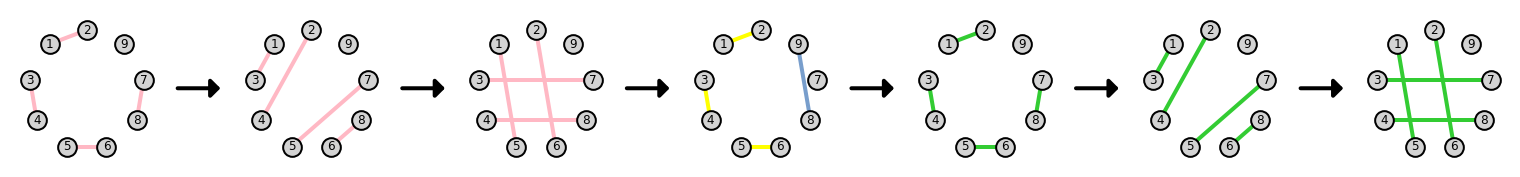

In [18]:
n_nodes = 9
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["0"], pos["1"] = pos["1"], pos["0"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

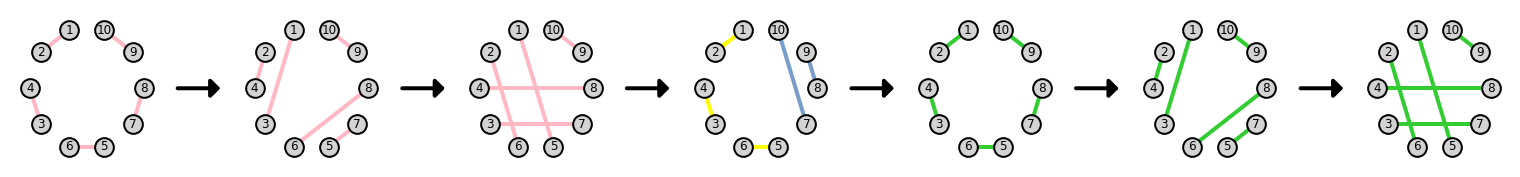

In [19]:
n_nodes = 10

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["2"], pos["3"] = pos["3"], pos["2"]
pos["4"], pos["5"] = pos["5"], pos["4"]


g = VisSimpleAdicGraph(n_nodes)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# 2-Peer ADIC

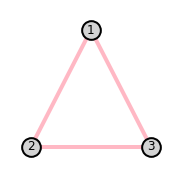

In [20]:
n_nodes = 3
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

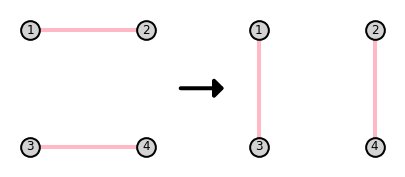

In [21]:
n_nodes = 4
max_degree = 2

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = VisAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

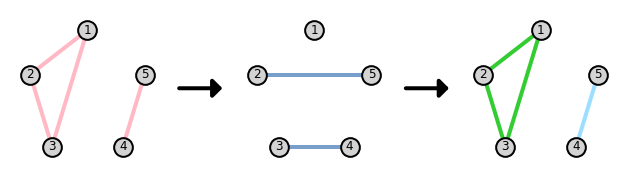

In [22]:
n_nodes = 5
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

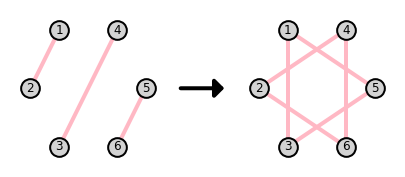

In [23]:
n_nodes = 6
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

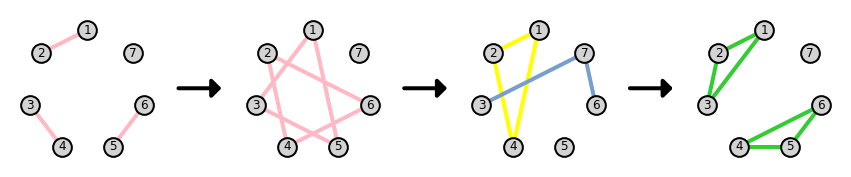

In [24]:
n_nodes = 7
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["3"], pos["2"] = pos["2"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

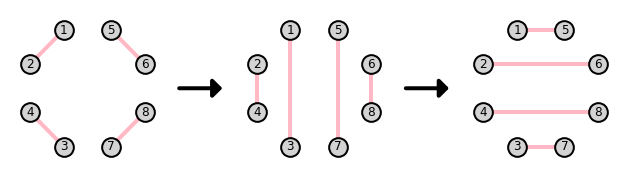

In [25]:
n_nodes = 8
max_degree = 2
pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

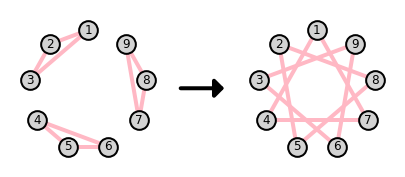

In [26]:
n_nodes = 9
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["0"], pos["1"] = pos["1"], pos["0"]
#pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

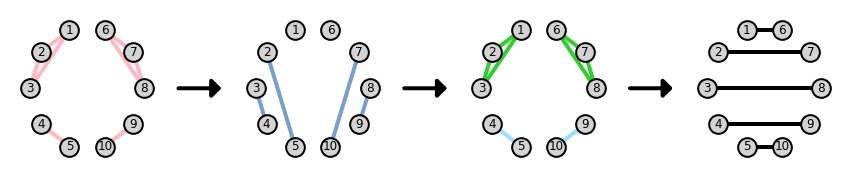

In [27]:
n_nodes = 10
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["5"], pos["6"], pos["7"], pos["8"], pos["9"] = pos["9"], pos["8"], pos["7"], pos["6"], pos["5"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# 2-peer Simple ADIC

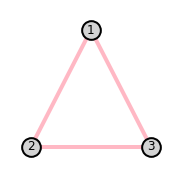

In [28]:
n_nodes = 3
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

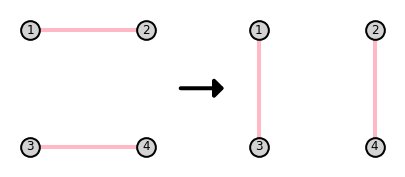

In [29]:
n_nodes = 4
max_degree = 2

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = VisSimpleAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

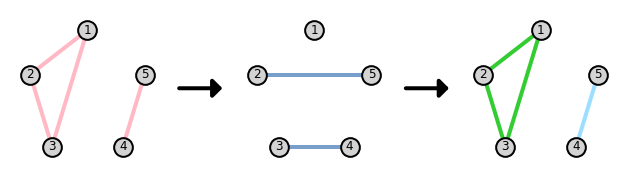

In [30]:
n_nodes = 5
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}


g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

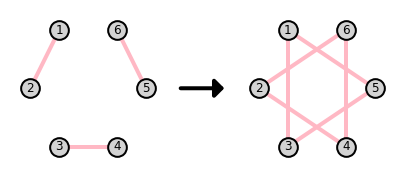

In [31]:
n_nodes = 6
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

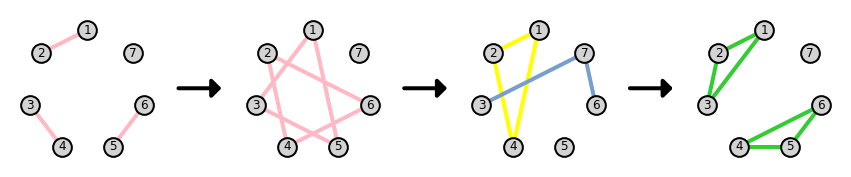

In [32]:
n_nodes = 7
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

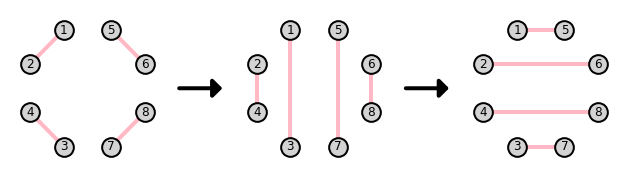

In [33]:
n_nodes = 8
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

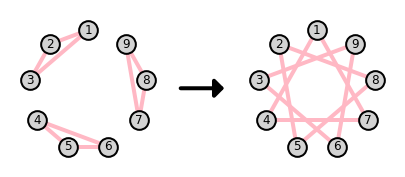

In [34]:
n_nodes = 9
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}



g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

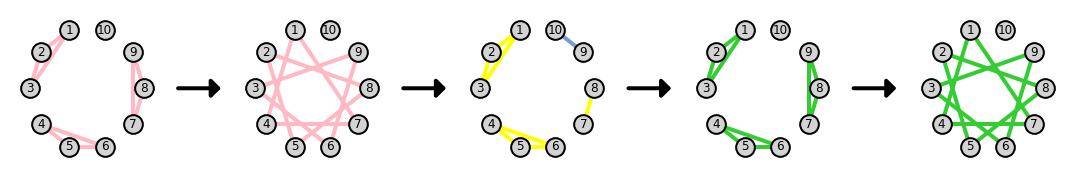

In [35]:
n_nodes = 10
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}


g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
#plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

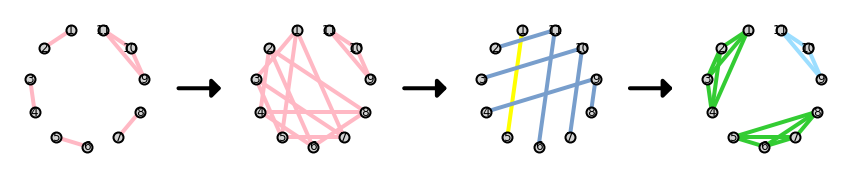

In [36]:
n_nodes = 8+3
max_degree = 3

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos, node_size=100)


# エッジに重みを入れたい

In [37]:
import sys
sys.path.append('../')
from adic_graph import *

In [38]:
def to_string(v):
    if v == 0.5:
        return r"$\frac{1}{2}$"
    elif v == 1/3:
        return r"$\frac{1}{3}$"
    elif (v - 2/3)**2 < 0.001:
        return r"$\frac{2}{3}$"
    elif v == 0.8:
        return r"$\frac{4}{5}$"
    elif (v - 4/7)**2 < 0.001:
        return r"$\frac{4}{7}$"
    else:
        print(v)

def visualize_with_edge_weight(graph, graph2, pos=None, node_size=350, edge_size=20, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length
    fig = plt.figure(figsize=(4*length + 1*(length-1), 4))
    grid = plt.GridSpec(1, 4*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 9,
    }
        
    for t in range(graph.length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+4])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
            
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):

                    if i > j:
                        if graph.w_list[t][i,j] != 0:
                            if graph.w_list[t][i,j] == -1:
                                G.add_edge(str(i), str(j), color=cherryblossompink, style="solid")
                                
                            if graph.w_list[t][i,j] == -2:
                                G.add_edge(str(i), str(j), color=darkpastelblue, style="solid")

                            if graph.w_list[t][i,j] == -3:
                                G.add_edge(str(i), str(j), color=yellow, style="solid")

                            if graph.w_list[t][i,j] == -4:
                                G.add_edge(str(i), str(j), color=limegreen, style="solid")

                            if graph.w_list[t][i,j] == -5:
                                G.add_edge(str(i), str(j), color=columbiablue, style="solid")
                            
                            if graph.w_list[t][i,j] == -6:
                                G.add_edge(str(i), str(j), color="black", style="solid")
                            
                            if graph.w_list[t][i, j] in [-1, -2, -3, -4, -5, -6] and i != j:
                                edge_labels[(str(i), str(j))] = to_string(graph2.w_list[t][i, j])
                                #pass
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        edge_color = [edge["color"] for edge in G.edges.values()]
        edge_style = [edge["style"] for edge in G.edges.values()]
        
        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, style=edge_style, edge_color=edge_color, **options)
        
        print(edge_labels)

        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                label_pos=0.5,
                font_size=edge_size)

        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+4:counter+5])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 5

{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('1', '0'): '$\\frac{1}{2}$', ('4', '3'): '$\\frac{2}{3}$', ('5', '2'): '$\\frac{2}{3}$'}
{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}


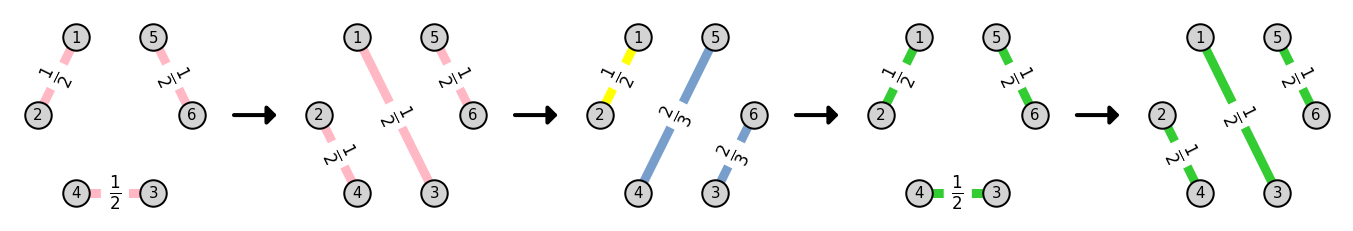

In [39]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["2"], pos["3"], pos["4"], pos["5"] = pos["3"], pos["2"], pos["5"], pos["4"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
g2 = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=24, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)
#plt.savefig(f"../pic/test.pdf", bbox_inches='tight', dpi=75)

{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$'}
{('1', '0'): '$\\frac{1}{2}$', ('4', '3'): '$\\frac{4}{5}$'}
{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$'}


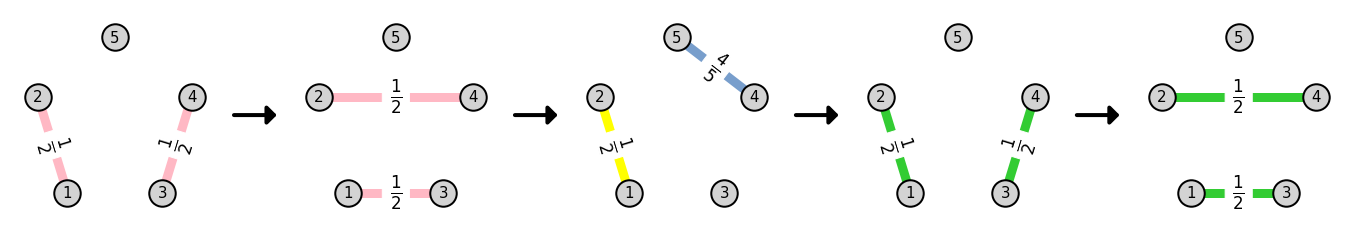

In [40]:
n_nodes = 5
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["0"], pos["1"] = pos["1"], pos["0"]
pos["0"], pos["1"], pos["2"], pos["3"], pos["4"] = pos["2"], pos["0"], pos["3"], pos["4"], pos["1"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
g2 = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=24, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

{('1', '0'): '$\\frac{1}{2}$', ('4', '3'): '$\\frac{1}{2}$'}
{('2', '1'): '$\\frac{2}{3}$', ('5', '4'): '$\\frac{2}{3}$'}
{('1', '0'): '$\\frac{1}{2}$', ('4', '3'): '$\\frac{1}{2}$'}
{('3', '0'): '$\\frac{1}{2}$', ('4', '1'): '$\\frac{1}{2}$', ('5', '2'): '$\\frac{1}{2}$'}


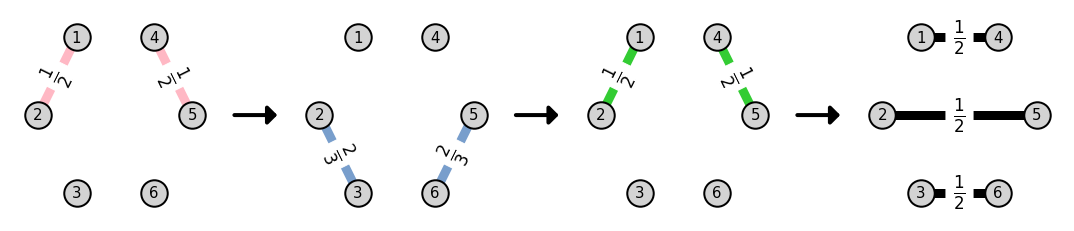

In [41]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = VisAdicGraph(n_nodes, max_degree=max_degree)
g2 = AdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=24, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('4', '2'): '$\\frac{4}{7}$', ('5', '1'): '$\\frac{4}{7}$', ('6', '3'): '$\\frac{4}{7}$'}
{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('6', '5'): '$\\frac{2}{3}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}


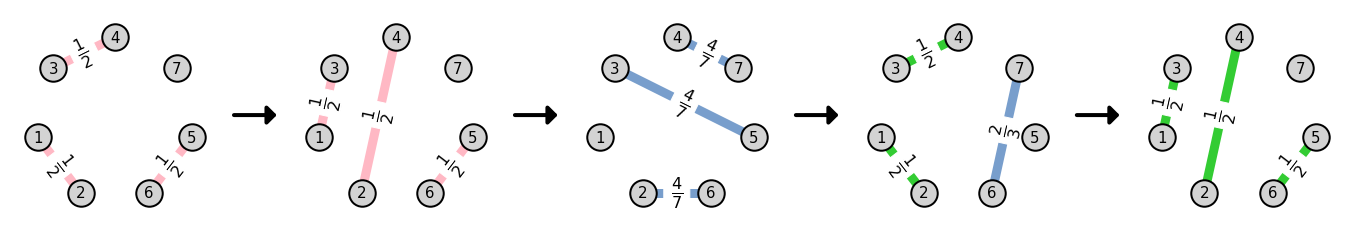

In [42]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]
pos["0"], pos["1"], pos["2"], pos["3"] = pos["3"], pos["2"], pos["1"], pos["0"]
pos["4"], pos["5"] = pos["5"], pos["4"]


g = VisAdicGraph(n_nodes, max_degree=max_degree)
g2 = AdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=23, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

In [60]:

def to_string(v):
    if v == 0.5:
        return r"$\frac{1}{2}$"
    elif v == 1/3:
        return ""
    elif (v - 2/3)**2 < 0.001:
        return r"$\frac{2}{3}$"
    elif v == 0.8:
        return r"$\frac{4}{5}$"
    elif (v - 3/7)**2 < 0.001:
        return r"$\frac{3}{7}$"
    elif (v - 4/7)**2 < 0.001:
        return r"$\frac{4}{7}$"
    elif v == 3/5:
        return r"$\frac{3}{5}$"
    else:
        print(v)
        
def visualize_with_edge_weight(graph, graph2, pos=None, node_size=350, edge_size=20, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length
    fig = plt.figure(figsize=(4*length + 1*(length-1), 4))
    grid = plt.GridSpec(1, 4*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 7,
    }
        
    for t in range(graph.length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+4])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
            
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):

                    if i > j:
                        if graph.w_list[t][i,j] != 0:
                            if graph.w_list[t][i,j] == -1:
                                G.add_edge(str(i), str(j), color=cherryblossompink, style="solid")
                                
                            if graph.w_list[t][i,j] == -2:
                                G.add_edge(str(i), str(j), color=darkpastelblue, style="solid")

                            if graph.w_list[t][i,j] == -3:
                                G.add_edge(str(i), str(j), color=yellow, style="solid")

                            if graph.w_list[t][i,j] == -4:
                                G.add_edge(str(i), str(j), color=limegreen, style="solid")

                            if graph.w_list[t][i,j] == -5:
                                G.add_edge(str(i), str(j), color=columbiablue, style="solid")
                            
                            if graph.w_list[t][i,j] == -6:
                                G.add_edge(str(i), str(j), color="black", style="solid")
                            
                            if graph.w_list[t][i, j] in [-1, -2, -3, -4, -5, -6] and i != j:
                                edge_labels[(str(i), str(j))] = to_string(graph2.w_list[t][i, j])
                                #pass
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        edge_color = [edge["color"] for edge in G.edges.values()]
        edge_style = [edge["style"] for edge in G.edges.values()]
        
        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, style=edge_style, edge_color=edge_color, **options)
        
        print(edge_labels)

        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                label_pos=0.5,
                font_size=edge_size)

        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+4:counter+5])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 5

{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('2', '0'): '', ('3', '1'): '', ('4', '0'): '', ('4', '2'): '', ('5', '1'): '', ('5', '3'): ''}
{('1', '0'): '', ('3', '0'): '', ('3', '1'): '', ('6', '2'): '$\\frac{3}{7}$', ('6', '5'): '$\\frac{3}{7}$'}
{('1', '0'): '', ('2', '0'): '', ('2', '1'): '', ('4', '3'): '', ('5', '3'): '', ('5', '4'): ''}


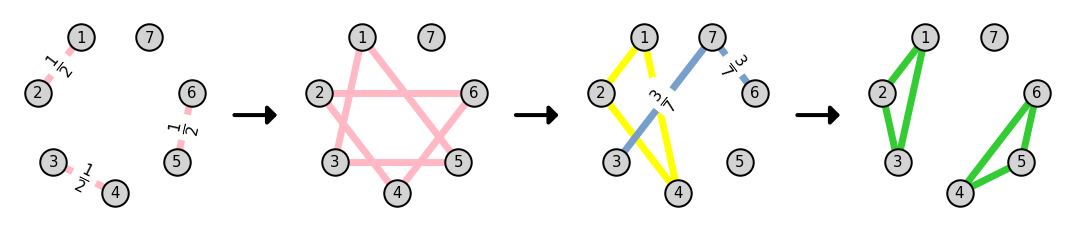

In [61]:
n_nodes = 7
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["2"], pos["3"], pos["4"], pos["5"] = pos["3"], pos["2"], pos["5"], pos["4"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
g2 = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=22, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)


{('1', '0'): '', ('2', '0'): '', ('2', '1'): '', ('4', '3'): '$\\frac{1}{2}$'}
{('3', '2'): '$\\frac{4}{7}$', ('4', '1'): '$\\frac{4}{7}$'}
{('1', '0'): '', ('2', '0'): '', ('2', '1'): '', ('4', '3'): '$\\frac{1}{2}$'}


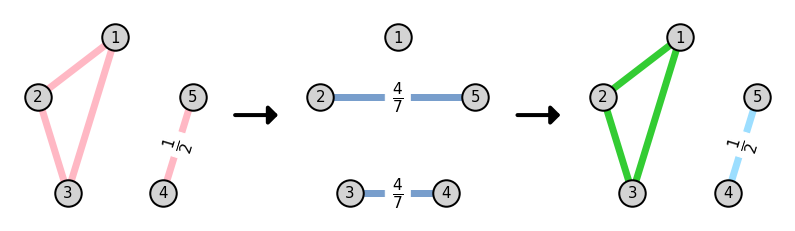

In [62]:
n_nodes = 5
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["0"], pos["1"] = pos["1"], pos["0"]
#pos["0"], pos["1"], pos["2"], pos["3"], pos["4"] = pos["2"], pos["0"], pos["3"], pos["4"], pos["1"]

g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
g2 = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=22, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}
{('4', '2'): '$\\frac{4}{7}$', ('5', '1'): '$\\frac{4}{7}$', ('6', '3'): '$\\frac{4}{7}$'}
{('1', '0'): '$\\frac{1}{2}$', ('3', '2'): '$\\frac{1}{2}$', ('6', '5'): '$\\frac{2}{3}$'}
{('2', '0'): '$\\frac{1}{2}$', ('3', '1'): '$\\frac{1}{2}$', ('5', '4'): '$\\frac{1}{2}$'}


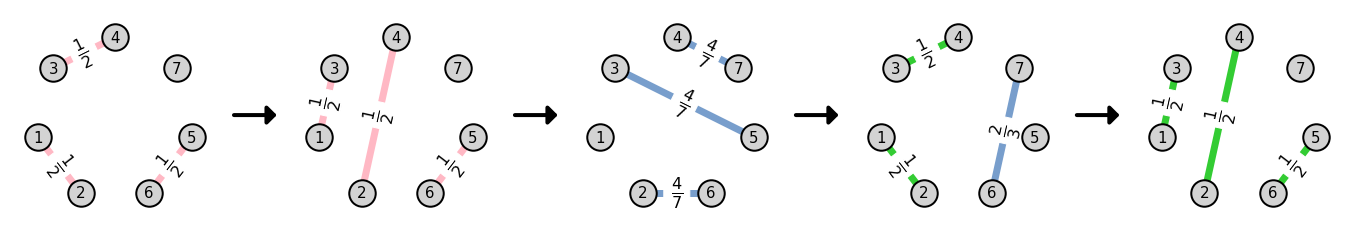

In [63]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]
pos["0"], pos["1"], pos["2"], pos["3"] = pos["3"], pos["2"], pos["1"], pos["0"]
pos["4"], pos["5"] = pos["5"], pos["4"]


g = VisSimpleAdicGraph(n_nodes, max_degree=max_degree)
g2 = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize_with_edge_weight(g, g2, pos, edge_label=True, edge_size=23, node_size=700, font_size=15)
plt.savefig(f"../pic/colored_{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)